<a href="https://colab.research.google.com/github/SabarinathK/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentimental Analysis

## What is sentimental Analysis?
*Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or   neutral.It’s also known as opinion mining, deriving the opinion or attitude of a speaker*.

## Why sentimental Analysis?
*Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.*

**This project project is about the sentimental analysis of social platform Twitter, respect to a Id name**


### Importing Required Library

In [ ]:
!pip install tweepy
!pip install textblob
!pip  install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy        # to get twitter data
from tweepy import OAuthHandler
from textblob import TextBlob
import re
from wordcloud import WordCloud

### Twitter API credentials
 - 1) Search "Twitter API management" on web and login with Twitter ID.
 - 2) Fill the required details Basic info > Intended use > Review > Terms.... on the form & verify mail id.
 - 3)create app and generate and copy those key listed below

In [ ]:
APIkey=#confidential
APISecreatkey= #confidential
accessToken= #confidential
accessTokenSecreat= #confidential

### Authentication
 *we need authenticate because we accessing twitter by python here*

In [ ]:
authenticate = tweepy.OAuthHandler(APIkey,APISecreatkey)
authenticate .set_access_token(accessToken,accessTokenSecreat)
api=tweepy.API(authenticate)

In [ ]:
posts= api.user_timeline(screen_name="PUBGMOBILE",count=100,lang="en",tweet_mode="extended")
i=1
for tweet in posts[:10]:
    print(str(i)+ ')' +tweet.full_text+ "\n") #to know the latest 10 tweet in one by one
    i=i+1

1)Want to get your Season 19 Royale Pass at a discount? 🔰 From now until May 16, take advantage of the Group Purchase Perks event in-game to get your RP19 pass 😎 You can either join a group, or create one - it's up to you! 💚 

Check out Season 19 now! 🔗 https://t.co/4C7DjNNxPr https://t.co/v2Qx7pIZ5K

2)Wait - who gave Buddy Godzilla an energy drink?!? 😳🥤 The cutest sidekick ever has landed in PUBG MOBILE to stand alongside you in combat 💥 #PUBGMOBILE #GodzillaVsKong #TeamGodzilla #PUBGMCompanion

Get Buddy Godzilla today! 🔗 https://t.co/i9hLXgscxz https://t.co/8mAvU0k47t

3)Godzilla's been really lighting up Erangel recently ⚡👀 Team Godzilla, how have your Titan Strikes encounters with Godzilla been going?! We've heard he gets easily irritated, so watch out... 😬 #PUBGMOBILE #GodzillaVsKong #TeamGodzilla

Hop in-game now 🔗 https://t.co/i9hLXgscxz https://t.co/hL2basReWK

4)We think our hearts just exploded 😫❤️ Thanks for giving back to your community @BiteGamingg! 🎁 https://t.co/Y0x051

### Create dataframe

In [ ]:
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=["Tweets"])
df

,Tweets
0,Want to get your Season 19 Royale Pass at a di...
1,Wait - who gave Buddy Godzilla an energy drink...
2,Godzilla's been really lighting up Erangel rec...
3,We think our hearts just exploded 😫❤️ Thanks f...
4,Godzilla is wreaking havoc in Erangel and he h...
...,...
95,Yess way to lock down the String Ensemble Set ...
96,There's no feeling like maxing out your PUBG M...
97,We see you @hotjukes 👀🔥 https://t.co/Ciu7KDdFuE
98,"Winning without a 🦺, 🎒, or 🪖 is tough, even fo..."


### Data Cleaning
*As its is a collection of raw tweets, it contain urls, id's, random numbers and text, emoji's, symbols etc those should be rermoved*

In [ ]:
def cleantweet (text):
    text= re.sub('@(A-Za-z0-9)+',' ', text)   #subract @, A-Z, a-z, 0-9
    text= re.sub('#',' ', text)               #subtract #         
    text= re.sub('RT(\s)+',' ', text)         #subtract Retweets
    text= re.sub('https?:\/\/\S+',' ',text)        #subtract urls
    return text

In [ ]:
df['Tweets']= df['Tweets'].apply(cleantweet)
df

,Tweets
0,Want to get your Season 19 Royale Pass at a di...
1,Wait - who gave Buddy Godzilla an energy drink...
2,Godzilla's been really lighting up Erangel rec...
3,We think our hearts just exploded 😫❤️ Thanks f...
4,Godzilla is wreaking havoc in Erangel and he h...
...,...
95,Yess way to lock down the String Ensemble Set ...
96,There's no feeling like maxing out your PUBG M...
97,We see you @hotjukes 👀🔥
98,"Winning without a 🦺, 🎒, or 🪖 is tough, even fo..."


In [ ]:
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
# create a function to get the Polarity of all the tweets
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

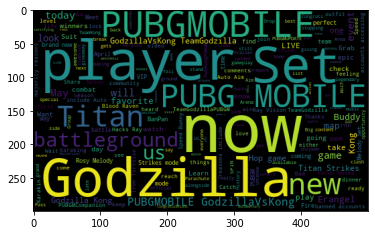

In [ ]:
# Word Cloud Visualization
allwords= ' '.join([i for i in df['Tweets']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)
plt.imshow(Cloud)
plt.show()

In [ ]:
def getAnalysis(score):
  if score<0:
     return 'Negative'
  elif score==0:
     return 'Neutral'
  else:
      return 'Positive'
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Want to get your Season 19 Royale Pass at a di...,0.000000,0.000000,Neutral
1,Wait - who gave Buddy Godzilla an energy drink...,0.000000,0.000000,Neutral
2,Godzilla's been really lighting up Erangel rec...,0.427778,0.211111,Positive
3,We think our hearts just exploded 😫❤️ Thanks f...,0.100000,0.100000,Positive
4,Godzilla is wreaking havoc in Erangel and he h...,0.300000,1.000000,Positive
...,...,...,...,...
95,Yess way to lock down the String Ensemble Set ...,0.288889,-0.155556,Negative
96,There's no feeling like maxing out your PUBG M...,0.000000,0.000000,Neutral
97,We see you @hotjukes 👀🔥,0.000000,0.000000,Neutral
98,"Winning without a 🦺, 🎒, or 🪖 is tough, even fo...",0.770833,0.402778,Positive


In [ ]:
df['Analysis'].value_counts()

Positive    58
Neutral     29
Negative    13
Name: Analysis, dtype: int64

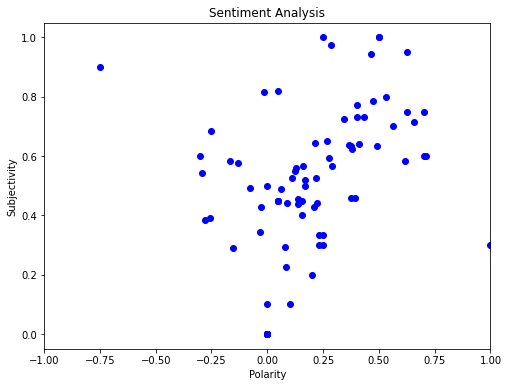

In [ ]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
 plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
 
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

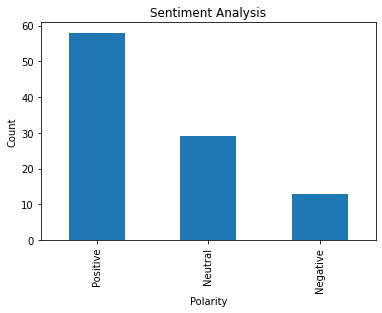

In [ ]:
 df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [ ]:
# Lets get positive tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Positive'):
   print(str(i)+ ') ' + sortedDF['Tweets'][j])
   print()
   i=i+1

1) Godzilla's been really lighting up Erangel recently ⚡👀 Team Godzilla, how have your Titan Strikes encounters with Godzilla been going?! We've heard he gets easily irritated, so watch out... 😬  PUBGMOBILE  GodzillaVsKong  TeamGodzilla

Hop in-game now 🔗    

2) We think our hearts just exploded 😫❤️ Thanks for giving back to your community @BiteGamingg! 🎁  

3) Godzilla is wreaking havoc in Erangel and he has drafted some of PUBG MOBILE's best players to battle against Kong in a war of the titans! ⚔️ 

Any guesses who is on  TeamGodzilla? 🤔  

4) Who’s going to take home the $25,000 grand prize? 😱 Catch the season finale of GameOn Titans with Powerbang, Seum, and some special guests! 💫🎉 Airs May 12th @ 5pm PST on   📺  

5) ⚠️ CAUTION: This video contains dangerous levels of cuteness ⚠️ Meet Buddy Godzilla and Buddy Kong, the adorable miniature versions of your favorite Titans! 😍💛  PUBGMOBILE  GodzillaVsKong  TeamGodzilla

Get your favorite  PUBGMCompanion today! 🔗    

6)  TeamGodzill

In [ ]:
# Lets get negative tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Negative'):
   print(str(i)+ ') ' + sortedDF['Tweets'][j])
   print()
   i=i+1

1) Players - Erangel has been taken over by Godzilla! 🙉🗺️ He's shaking things up and making gameplay more intense than ever 🎯🔫 Can you still take home the chicken dinner? 🏆👀  PUBGMOBILE  GodzillaVsKong  TeamGodzilla

Hop in-game today! 🔗    

2) He tired, he nap, he want a chicken dinner snacc 🍗😛 With Godzilla Buddy by your side, the battlegrounds just got a whole lot cuter 🤗💚  PUBGMOBILE  GodzillaVsKong  TeamGodzilla  PUBGMCompanion

Get your Godzilla Buddy now! 🔗    

3) Seeing some crazy stuff in Titan Strikes mode?! 😳 Record a clip of you with any Titan Strikes mode content in-game then follow the link below 😉🎥⚡  PicturewithGodzilla  PicturewithKong  PUBGMOBILE  GodzillaVsKong  TeamGodzilla  TeamKong

Rules 🔗    

4) Which side are YOU on?! 👈 👀 Now you can rep either  TeamGodzillaPUBGM or  TeamKongPUBGM on Facebook and Twitter with our epic avatar frames! 🖼️⚡

Click the link below and scroll down to  5 on the list to deck out your profile pictures now! 🔗⬇️ 
   

5) You didn't have 

In [ ]:
# Lets get neutral tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Neutral'):
   print(str(i)+ ') ' + sortedDF['Tweets'][j])
   print()
   i=i+1

1) Want to get your Season 19 Royale Pass at a discount? 🔰 From now until May 16, take advantage of the Group Purchase Perks event in-game to get your RP19 pass 😎 You can either join a group, or create one - it's up to you! 💚 

Check out Season 19 now! 🔗    

2) Wait - who gave Buddy Godzilla an energy drink?!? 😳🥤 The cutest sidekick ever has landed in PUBG MOBILE to stand alongside you in combat 💥  PUBGMOBILE  GodzillaVsKong  TeamGodzilla  PUBGMCompanion

Get Buddy Godzilla today! 🔗    

3) Erangel is his now... 🗺️👀 Learn how to dominate Titan Strikes mode alongside Godzilla with our helpful Patch Notes below! 🏆⬇️  PUBGMOBILE  GodzillaVsKong  TeamGodzilla

Patch notes 🔗    

4) @BobTheFish1238  

5) Nothing gets between @theVita4Law and their targets... even trees 🔥😳🌳🎯  

6) Congrats! 🔥 Now you have to have everyone change your name to Ace in their contacts 😎📲  

7) When's your next class?! 👨‍🏫🥋  

8) But did they believe you?! 😂🔥  

9) This week, the Titans are putting the pedal to t